![](https://logos-world.net/wp-content/uploads/2020/09/Starbucks-Emblem.png)

## Introduction

Congratulations! You've been hired as a data analysis intern at Starbucks - the world's largest coffeehouse chain (you may have heard of it)! Starbucks is opening a new location and wants to tailor **different** advertisements to **different** customers. 

After meeting with the Starbucks marketing manager, you learn that the current marketing efforts are not getting the expected return-on-investment (ROI). The manager believes the reason for this is that the marketing team doesn't have a good grasp of their customers. They need to be able to better segment their customers based on their shopping habits and potential value to Starbucks, so that they can effectively target their marketing and make the best use of their advertising dollars. This is where you come in!

The marketing manager asks you to do an RFM analysis. RFM stands for **R**ecency, **F**requency, and **M**onetary. It is a marketing technique used to determine quantitatively (with numbers) which customers are the best ones to focus on. The analysis examines how recently a customer has made a purchase (recency), how often they purchase (frequency), and how much money the customer has spent (monetary).

You will be running this analysis on a data set from Starbucks that captures details about their customers.

**please read the instructions carefully!**

## Part I: Setting Up For Analysis

![](https://media.giphy.com/media/pObQUeN7IK3yLvxQlE/giphy-downsized-large.gif)

The first thing we need to do when working with data in Python is to get our environment set up, and to load in the data for a preliminary inspection.

### Task 1

Import the `numpy`, `pandas`, and `plotly.express` libraries.

In [ ]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import plotly.express as px

### Task 2

The data you will be working with has been stored in a CSV file, called `starbucks_purchases.csv`. 

**A.** Load this data file from the datasets folder into a pandas DataFrame named `raw_df`.

**B.** Print the number of rows and columns in the DataFrame by using `shape`. 

**C.** Preview the first few rows of the data.

In [ ]:
# Load dataset
raw_df = pd.read_csv('datasets/starbucks_purchases.csv')

# Print DataFrame shape
print(raw_df.shape)

# Preview DataFrame
raw_df.head()

(138953, 4)


,order_id,customer_id,sales_amount,purchase_date
0,5b08022135e51475eedac2e844b5905e,02c083884c7d45b39cc68e1314fec56c,0.83,2023/04/26
1,35c629f18d73dde81ab33ec20127fe78,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56,2023/04/27
2,d73fe896caaf936a8babdfc44d2b0deb,54890f68699049c2a04d415abc25e717,13.23,2023/04/26
3,644d7d1f7509cdd406800bcd586b9a95,b2f1cd155b864803ad8334cdf13c4bd2,19.51,2023/04/26
4,ff4b1c5688dd4bae0bff3035a6c67953,fe97aa22dd3e48c8b143116a8403dd52,18.97,2023/04/23


#### Data Dictionary

<span style='background :#DDD5F3'>You should see a DataFrame with `138,953` rows and `4` columns.</span>

Each row is an order made on the Starbucks app between October 2022 and May 2023. The columns contain the following information about the orders:

- **order_id** - The unique order number associated with the order.
- **customer_id** - The unique identifier of the customer who made the purchase. Customer ids can appear multiple times, once for each purchase they make on the app.
- **sales_amount** - The amount the customer spent on the order.
- **purchase_date** - The purchase date of the order in `yyyy/mm/dd` format.

## Part II: RFM Calculations

![](https://media.giphy.com/media/o8pzT9jQJcgRmAiIYT/giphy-downsized.gif)

Now that we have our data loaded in, let's calculate the Recency, Frequency, and Monetary metrics for each customer. For this dataset, these metrics look like:

- **Recency:** The number of days elapsed since the customer's most recent purchase.
- **Frequency:** The number of orders made by the customer. This is equivalent to the number of `order_id`'s associated with the customer.
- **Monetary:** The sum of the `sales_amount` values associated with the customer's orders.

### Task 3

We can calculate the Frequency and Monetary metrics directly from the data as given! Let's do that in this Task. 

You'll create a new DataFrame called `fm_df` that summarizes the `raw_df` DataFrame. You will *group* the data *by* each customer. Your summary should include:
- the total **count** of each `order_id` (to get the total number of purchases made). 
- the total **sum** spent per customer (use the `sales_amount` column)
- the **max** of the `purchase_date` to know when the last time that customer made an order.

**A.** First, create a dictionary mapping the column you want to aggregate to the aggregation you want to perform. 
<span style='background :#FFF59E'>**Hint:** This should be a dictionary with three keys!</span>

**B.** Use the `.groupby()` method on the `raw_df` DataFrame, together with the `.agg()` method and your dictionary from part **A.** to group your data by `customer_id`. Store the results in a new DataFrame named `fm_df`. 

<span style='background :#FFF59E'>**Tip**: There's a lot of data to tabulate, so this may take a little time to run. Don't panic if it takes more than just a few seconds to finish running.</span>

In [ ]:
# Create a dictionary of column names and aggregation operations
# This will be used in your .groupby! 
agg_dict = {
    'order_id':'count',
    'sales_amount':'sum',
    'purchase_date':'max'
}

# Group by customer ID and aggregate data
fm_df = raw_df.groupby('customer_id').agg(agg_dict)

In [ ]:
# Print DataFrame shape
print(fm_df.shape)

# Preview DataFrame
fm_df

(16578, 3)


,order_id,sales_amount,purchase_date
customer_id,,,
0009655768c64bdeb2e877511632db8f,8,127.60,2023/04/26
00116118485d4dfda04fdbaba9a87b5c,3,4.09,2023/04/29
0011e0d4e6b944f998e987f904e8c1e5,5,79.46,2023/04/29
0020c2b971eb4e9188eac86d93036a77,8,196.86,2023/04/28
0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,2023/04/28
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,11,580.98,2023/04/27
fff7576017104bcc8677a8d63322b5e1,6,29.94,2023/04/26
fff8957ea8b240a6b5e634b6ee8eafcf,5,12.15,2023/04/28


<span style='background :#DDD5F3'>If done correctly, your new DataFrame `fm_df` should have `16,578` rows and `3` columns.</span>

### Task 4

The column names in the `fm_df` no longer make sense, since they don't have the same meaning as the original data. Let's fix that.

Rename the `order_id`, `sales_amount`, and `purchase_date` columns to be `frequency`, `monetary`, and `last_purchase_date`, respectively. Then preview the first ten rows.

<span style='background :#FFF59E'>**Note:** *When using the* `rename()` *method, you can specify the* `inplace=True` *parameter* so that you don't need to create a new DataFrame here. Just remember, this modifies the underlying data. If you run the cell more than once, you will run into an error, since you can't rename a column that has already been renamed! You'll have to run the notebook from the top again.</span>

In [ ]:
# Rename columns
fm_df.rename(columns={'order_id':'frequency', 'sales_amount':'monetary', 'purchase_date':'last_purchase_date'}, inplace=True)

# Preview data
fm_df

,frequency,monetary,last_purchase_date
customer_id,,,
0009655768c64bdeb2e877511632db8f,8,127.60,2023/04/26
00116118485d4dfda04fdbaba9a87b5c,3,4.09,2023/04/29
0011e0d4e6b944f998e987f904e8c1e5,5,79.46,2023/04/29
0020c2b971eb4e9188eac86d93036a77,8,196.86,2023/04/28
0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,2023/04/28
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,11,580.98,2023/04/27
fff7576017104bcc8677a8d63322b5e1,6,29.94,2023/04/26
fff8957ea8b240a6b5e634b6ee8eafcf,5,12.15,2023/04/28


In [ ]:
# RUN THIS CELL - DO NOT MODIFY

# Resets the index so that `customer_id` is now a column in the data instead of the index.
fm_df = fm_df.reset_index()

### Task 5

You're almost there!

In this Task, you get to leverage work from another member of the data analytics team at Starbucks! Their work has been stored in a file named `recency.csv`, and shared with you. In it, you'll find the number of days that have passed between a given date in the table and May 2nd, 2023.

**A.** Load the `recency.csv` dataset from the datasets folder into a DataFrame called `recency`. Preview the first five rows. 

In [ ]:
# Load the customer recency data 
recency = pd.read_csv('datasets/recency.csv')

# Preview the customer regency data
recency

,date,recency
0,2023/05/02,0
1,2023/05/01,1
2,2023/04/30,2
3,2023/04/29,3
4,2023/04/28,4
...,...,...
361,2022/05/06,361
362,2022/05/05,362
363,2022/05/04,363
364,2022/05/03,364


**B.** You need to join this `recency` DataFrame to the `fm_df` DataFrame, joining on the `date` field in the `recency` dataframe with the `last_purchase_date` field in the `fm_df`. Use `pd.merge()` to join `recency` to `fm_df`. Store the joined data in a DataFrame called `rfm_df`. Preview your joined data.

<span style='background :#FFF59E'>**Hint:** You will need to specify both the `left_on` and `right_on` parameters.</span>

<span style='background :#FFF59E'>**Tip:** Using the `pd.merge()` function with `fm_df` as the first paramter, both a left join and an inner join will yield the same (correct) result! Do you know why?</span>

In [ ]:
# Join fm_df with the recency DataFrame
rfm_df = pd.merge(fm_df, recency, left_on='last_purchase_date', right_on='date', how='inner')

# Preview joined data
rfm_df

,customer_id,frequency,monetary,last_purchase_date,date,recency
0,0009655768c64bdeb2e877511632db8f,8,127.60,2023/04/26,2023/04/26,6
1,00426fe3ffde4c6b9cb9ad6d077a13ea,17,68.51,2023/04/26,2023/04/26,6
2,00840a2ca5d2408e982d56544dc14ffd,17,62.93,2023/04/26,2023/04/26,6
3,008d7088107b468893889da0ede0df5c,7,16.18,2023/04/26,2023/04/26,6
4,00b3400e4ff64ee68ce9ada1d0c222f0,10,163.92,2023/04/26,2023/04/26,6
...,...,...,...,...,...,...
16573,f56aa449c91d4bf587d9268a5d04aa47,3,7.50,2023/04/20,2023/04/20,12
16574,fe97ae4e27154d1aad39ceab8c25c9ed,5,6.51,2023/04/20,2023/04/20,12
16575,4e22b76b899443baa4999b85cbdcec21,3,5.33,2023/04/17,2023/04/17,15
16576,756418e9da164ec9bd7af9886df13d2a,7,200.98,2023/04/17,2023/04/17,15


<span style='background :#DDD5F3'>If done correctly, the number of rows should be the same as before, `16,578` but now with a total of `6` columns.</span>

### Task 6

The two columns, `date` and `last_purchase_date` are no longer relevant. We have everything else we need in the other columns. Let's drop those from the dataset.

In [ ]:
# drop the date and last_purchase_date columns in rfm_df
rfm_df = rfm_df.drop(columns=['date', 'last_purchase_date'])

# preview data to ensure columns were dropped
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0009655768c64bdeb2e877511632db8f,8,127.60,6
1,00426fe3ffde4c6b9cb9ad6d077a13ea,17,68.51,6
2,00840a2ca5d2408e982d56544dc14ffd,17,62.93,6
3,008d7088107b468893889da0ede0df5c,7,16.18,6
4,00b3400e4ff64ee68ce9ada1d0c222f0,10,163.92,6


## Part III: Frequency Analysis

![](https://media.giphy.com/media/l2RdUvClCHDTvNnU2j/giphy.gif)

Great work on getting the data all wrangled together! There is a lot to analyze here, but that's why you work on a team so that you can each tackle certain parts before bringing it all back together. 

For the remainder of the project, you're going to focus only the "F" in RFM. Your data teammates will tackle the R and M. (and you can even do it too in the LevelUp!)

### Task 7
Let's start out with a quick visualization of the *distribution*, or shape, of the frequency metric so that Starbucks can better understand just how often does their customers make purchases.

**A.** Use the `.histogram` function from Plotly to create a histogram of the `frequency` column of your RFM DataFrame. Add a title. 

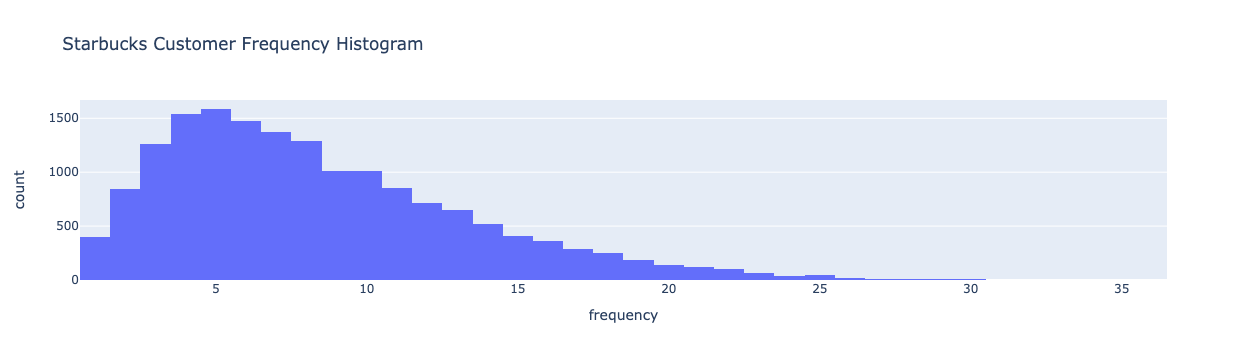

In [ ]:
# Create a histogram of frequency 
# add a title
px.histogram(rfm_df, x='frequency', title='Starbucks Customer Frequency Histogram')

**B.** What does this `frequency` histogram tell us about the shopping patterns of most customers?

*(Double-click this cell to type in your answer.)*


## Task 8
In RFM analysis, each factor is given a letter grade based on its value. For Frequency, a customer who make frequent purchases would be given an "A" grade, while those who make purchases less often would be given lower grades.

The marketing department at Starbucks has defined cut-off points for each letter grade, based on the number of purchases each customer has made over a given period of time. They've decided: 
  - More than 11 purchases is an A <br>
  - More than 7 purchases (but less than 11) is a B <br>
  - More than 5 purchases (but less than 7) is a C <br>
  - Less than 5 is a D <br>

You need to write a function that reads in the frequency value and uses `if`/`elif`/`else` statements to compare the value to the cut-off points and assign a grade. For example, `if` the frequency value is larger than 11, the function should assign A for the letter grade. 

In the cell below, you'll find starter code for the user-defined function called `frequency_grade`. Complete the code with `if`/`elif`/`else` statements.  

Make sure you run the cell when you've completed the function!

In [ ]:
def frequency_grade(frequency): 
    '''
    Given a frequency value, function compares the value to 
    the frequency grading scale and returns the appropriate
    grade. 
    '''
    # check if frequency less than or equal to 5
    if frequency <= 5:
        # if so, assign letter grade D
        return 'D'
        
    # check if frequency is less than or equal to 7 
    elif frequency <= 7:
        # if so, assign letter grade C
        return 'C'
        
    # check if frequency is less than or equal to 11
    elif frequency <= 11:
        # if so, assign letter grade B
        return 'B'
        
    # otherwise, assign letter grade A
    else:  
        return 'A'
    # return letter grade
   

Great! Let's `apply` this function to the `rfm_df`. No need to modify anything in the following cell, just run it!

In [ ]:
# RUN THIS CELL - Do Not Modify!

# apply frequncy_grade to rfm_df 
rfm_df['frequency_grade'] = rfm_df['frequency'].apply(frequency_grade)

# preview DataFrame
rfm_df.head()

,customer_id,frequency,monetary,recency,frequency_grade
0,0009655768c64bdeb2e877511632db8f,8,127.60,6,B
1,00426fe3ffde4c6b9cb9ad6d077a13ea,17,68.51,6,A
2,00840a2ca5d2408e982d56544dc14ffd,17,62.93,6,A
3,008d7088107b468893889da0ede0df5c,7,16.18,6,C
4,00b3400e4ff64ee68ce9ada1d0c222f0,10,163.92,6,B


### Task 9

The marketing team has two final asks from you: 

Can you create a bar chart illustrating the frequency grades assigned to the Starbucks customer base, as part of the RFM analysis, and advise them on a marketing strategy? 

**A.** Use the `.histogram()` function to create a bar chart of each frequency grade. Make sure to give your chart a title and label the horizontal and vertical axes!

<span style='background :#FFF59E'>**PRO TIP:** Add the following argument in your `px.histogram` function to order the bars by grade: <br>
>`category_orders = {'frequency_grade': ['A', 'B', 'C', 'D']}`</span>

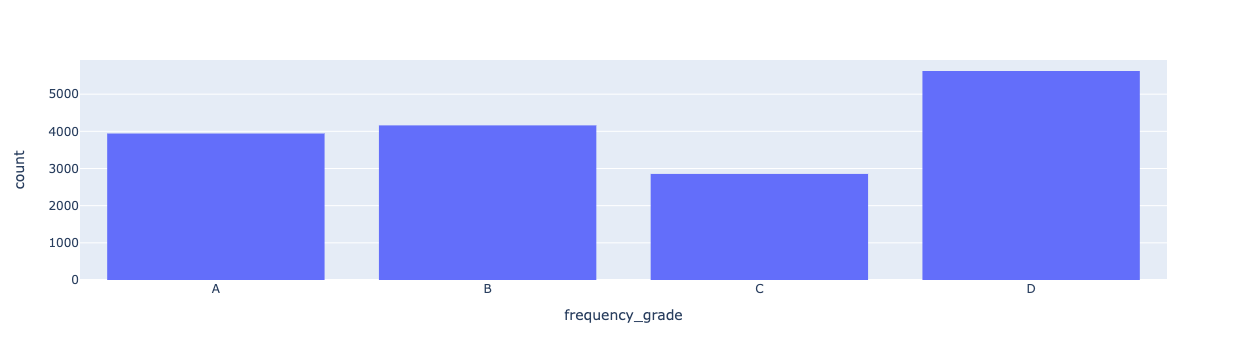

In [ ]:
# Create a bar chart of total customer spending by grade
px.histogram(rfm_df, x='frequency_grade', category_orders = {'frequency_grade': ['A', 'B', 'C', 'D']})

**B.** Summarize, for the marketing team, what this chart represents. What marketing strategy can you offer so that Starbucks customers in the 'D' grade move toward higher frequency grades? 

<span style='background :#FFF59E'>**Remember**: Since these are all users on the app, you can customize messages to them based on any splitting of the data you would like.</span>

*(Double-click this cell to type in your answer.)*

## LevelUp

![](https://media.giphy.com/media/E6B4aFk4akYRW/giphy.gif)

Earlier in the project, you were only focused on only one feature, `frequency`. In these LevelUp tasks, you will be looking at the entire RFM data to see all the different ways your customers are segmented.

In the `datasets` folder you will find the `full_rfm_data.csv`. Load that into your Jupyter Notebooks so you can begin your analysis!

In [ ]:
# Load the full rfm data and store it in a variable called `full_rfm`
full_rfm = pd.read_csv('datasets/full_rfm_data.csv')

In [ ]:
# Preview a sample with 10 rows of the data frame
full_rfm.sample(10)

,customer_id,recency,frequency,monetary,R_grade,F_grade,M_grade,RFM_grade
4790,4988ee1221ea4be0a779d8bc29171f44,10,2,27.25,A,D,C,ADC
126,020d72e77c704c42bb0a858c1aaa3bcd,5,18,252.14,C,A,A,CAA
13822,d4db6fc5233b415fbb0769bc4575fee5,8,12,142.39,A,A,B,AAB
6172,5f32718d07b64338a5517eed5c1eb232,2,12,102.66,D,A,B,DAB
3661,391d8ec364374b38b3b2573d9e6b7d07,6,2,57.66,B,D,C,BDC
9657,9432bb48818349a5a6c6ceb3e67d3998,11,7,20.73,A,C,D,ACD
7188,6eb33af1541241f9b986c48fef3822ca,7,3,59.59,A,D,C,ADC
787,0c48cec9c44b4b47923a70dcb0641662,3,8,187.32,D,B,A,DBA
7555,74bf36d7ea324ea8bd199ac48c2a667e,1,6,47.61,D,C,C,DCC
6924,6aee3fa27e9f4699ad712a351e812ca3,8,11,101.38,A,B,B,ABB


As you can see, this dataframe has a few more columns than the work you did earlier. A few things to notice:

* The `R_grade`, `F_grade`, and `M_grade` columns represent the recency grade, frequency grade, and monetary grade, respectively.
* The `RFM_grade` is the combination of the 3 individual grades.

The `RFM_grade` is what allows you to more finely segment your customers instead of looking at only individual grades.

Let's investigate the different categories. First, run the cell below. It will make your visualization easier to read.

In [ ]:
# RUN THIS CELL - Do Not Modify

# Takes all the unique RFM grades and sorts them for easier viewing
grade_orders = list(full_rfm['RFM_grade'].unique())
grade_orders.sort()

Use the a `.histogram()` function to create a bar chart of all the RFM_grades. 

<span style='background :#FFF59E'>**Pro Tip:** Add the following argument in your `px.histogram` function to order the bars by grade: <br>
>`category_orders = {'RFM_grade': grade_orders}`</span>

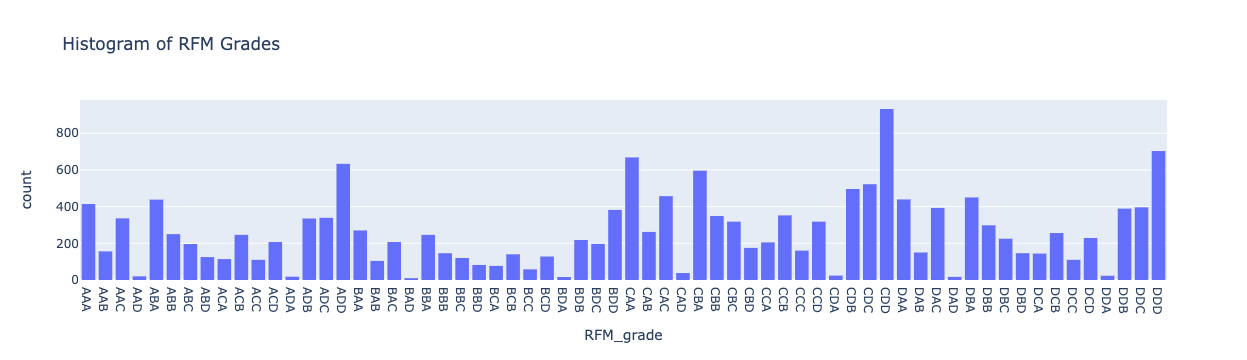

In [ ]:
# Create a bar chart of each of the RFM grades
px.histogram(full_rfm, x='RFM_grade', title='Histogram of RFM Grades', category_orders={'RFM_grade': grade_orders})

Using the chart to guide you answer the following questions: 

* What 2 segments (i.e. `RFM_grade`) do you think makes the most sense for Starbucks to focus on? 
* Why did you choose those 2 segments?
* What marketing tactics would you suggest using to move them into a "higher" grade category?


<span style='background :#FFF59E'>**Note**: This a very open-ended question. There is no right or wrong answer, but you should be referencing the data to guide your decisions.</span>

*(Double-click this cell to type your answer)*

That's it! You did it! These skills are extremely valuable and give you a solid grasp of how they are applied in a work setting.

Congratulations on getting this far!

Now, update that resume and go celebrate!